---
### Importing quality checked data and creating new DataFrames

In [ ]:
import pandas as pd

def gd_path(file_id):
    """Generate a shareable link from Google Drive file id."""
    return f"https://drive.google.com/uc?export=download&id={file_id}"

# Google Drive file ids
file_ids = {
    "brands": "1rGaU7M127HRCiBzw41Rv_SwZByHafT86",
    "orderlines": "1dAhM7ScbCGwLWkmBRhoEw2OUL6rkzxpF",
    "orders": "16acxvtxHTaZdwLqIpBA52tCJ1PAF80Rb",
    "products": "1Q4NLNKEzVoSAwPq8OFOSZyfwLIXnJTen",
}

# Read data from Google Drive
brands_qu = pd.read_csv(gd_path(file_ids["brands"]), sep=",")
orderlines_qu = pd.read_csv(gd_path(file_ids["orderlines"]), sep=",", parse_dates=["date"])
orders_qu = pd.read_csv(gd_path(file_ids["orders"]), sep=",", parse_dates=["created_date"])
products_qu = pd.read_csv(gd_path(file_ids["products"]), sep=",")

<font color="red"> The code below will create copies of each of the quality checked datasets:
* `brands_qu` --> `brands_df`
* `orderlines_qu` --> `orderlines_df`
* `orders_qu` --> `orders_df`
* `products_qu` --> `products_df`

In [ ]:
# this will create copy of the data cleaned and quality checked datasets
brands_df = brands_qu.copy()
orderlines_df = orderlines_qu.copy()
orders_df = orders_qu.copy()
products_df = products_qu.copy()

In [ ]:
brands_df.info()

In [ ]:
orderlines_df.info()

In [ ]:
orders_df.info()

In [ ]:
products_df.info()

# 9. Analyse Discounts

* The Marketing Team Lead is convinced that offering discounts is beneficial in the long run. She believes discounts improve customer acquisition, satisfaction and retention, and allow the company to grow.
* The main investors in the Board are worried about offering aggressive discounts. They have pointed out how the company’s recent quarterly results showed an increase in orders placed, but a decrease in the total revenue. They prefer that the company positions itself in the quality segment, rather than competing to offer the lowest prices in the market.

Merges `products_df` with `orderlines_df` and with `orders_df`

In [ ]:
ol = orderlines_df
p = products_df
p_ol = ol.merge(
    p,
    how="left",
    left_on="sku",
    right_on="sku"
)

o = orders_df
p_ol_o = p_ol.merge(
    o,
    how="left",
    left_on="id_order",
    right_on="order_id"
)

### 9.1. Revenue, Discount and Discount percentage

In [ ]:
# calculates the discount and writes in in column "discount"
p_ol_o["discount"] = p_ol_o["price"] - p_ol_o["unit_price"]

In [ ]:
# Revenue:
p_ol_o["revenue"] = (p_ol_o["product_quantity"]) * (p_ol_o["unit_price"])

In [ ]:
# Discount %:
p_ol_o["discount_percentage"] = round(100 * (p_ol_o["discount"]) / (p_ol_o["price"]))

In [ ]:
p_ol_o["discount_percentage"].mean()

21.626279737791855

### 9.2. Quarters in 2017

In [ ]:
# 2017 Q1
p_ol_o_q1 = p_ol_o.loc[p_ol_o["created_date"].between("2017-01-01", "2017-03-31")]

In [ ]:
# 2017 Q2
p_ol_o_q2 = p_ol_o.loc[p_ol_o["created_date"].between("2017-04-01", "2017-06-30")]

In [ ]:
# 2017 Q3
p_ol_o_q3 = p_ol_o.loc[p_ol_o["created_date"].between("2017-07-01", "2017-09-30")]

In [ ]:
# 2017 Q4
p_ol_o_q4 = p_ol_o.loc[p_ol_o["created_date"].between("2017-10-01", "2018-12-31")]

In [ ]:
p_ol_o_q1

### 9.3. Plotting the revenue against the discount

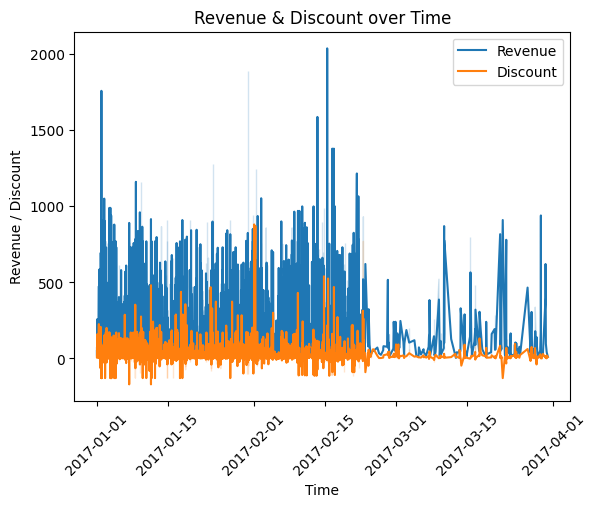

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=p_ol_o_q1, x='created_date', y='revenue', label='Revenue')
sns.lineplot(data=p_ol_o_q1, x='created_date', y='discount', label='Discount')
plt.xlabel('Time')
plt.ylabel('Revenue / Discount')
plt.title('Revenue & Discount over Time')
plt.xticks(rotation=45);

Just an overview of the discounts:

In [ ]:
p_ol_o["discount"] = p_ol_o["price"] - p_ol_o["unit_price"]
p_ol_o[["sku", "name", "unit_price", "price", "discount", "date"]]

,sku,name,unit_price,price,discount,date
0,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,47.49,60.99,13.50,2017-01-01 01:46:16
1,IOT0014,iOttie Easy View 2 Car Black Support,18.99,22.95,3.96,2017-01-01 01:50:34
2,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,72.19,89.00,16.81,2017-01-01 01:54:11
3,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,60.90,76.99,16.09,2017-01-01 02:20:14
4,PEB0015,Pebble Smartwatch Time Steel Black,142.49,299.99,157.50,2017-01-01 02:38:50
...,...,...,...,...,...,...
54319,TUC0207,Tucano Elements Second Skin Macbook Sleeve 12 ...,16.52,24.99,8.47,2018-03-14 11:45:05
54320,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,9.99,25.00,15.01,2018-03-14 11:49:01
54321,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,9.99,25.00,15.01,2018-03-14 11:49:36
54322,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,9.99,25.00,15.01,2018-03-14 11:54:35


Discount and time dimension:

In [ ]:
sorted_discounts = p_ol_o.sort_values(by='discount', ascending=False)
sorted_discounts[["sku", "name", "unit_price", "price", "discount", "date"]]

,sku,name,unit_price,price,discount,date
18222,PAC2067,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",479.00,1799.00,1320.00,2017-07-26 19:41:00
13606,PAC2071,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",489.00,1799.00,1310.00,2017-06-11 12:34:44
12222,PAC2065,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",499.00,1799.00,1300.00,2017-05-20 07:18:41
29493,PAC2281,"Second hand - Apple iMac 20 ""Core 2 Duo 226GHz...",255.59,1499.00,1243.41,2017-11-14 12:47:25
12334,PAC2063,"Second hand - Apple iMac 20 ""Core 2 Duo 266GHz...",280.17,1499.00,1218.83,2017-05-22 23:12:18
...,...,...,...,...,...,...
27734,APP1189,NaN,607.71,NaN,NaN,2017-10-30 19:15:49
40801,ELG0014,NaN,91.99,NaN,NaN,2017-12-24 19:36:58
44313,HTE0025,NaN,20.99,NaN,NaN,2018-01-07 16:40:59
47284,HOW0001-A,NaN,144.12,NaN,NaN,2018-01-23 23:11:50


## 9.4. Discount average **with** outliers:

In [ ]:
# calculation of the discount percentage
p_ol_o['discount_percentage'] = (p_ol_o['discount'] / p_ol_o['price']) * 100

In [ ]:
p_ol_o['discount_percentage'].mean()

21.63351527020659

## 9.5. Discount average **without** outliers:


In [ ]:
Q1 = p_ol_o['discount_percentage'].quantile(0.25)
Q3 = p_ol_o['discount_percentage'].quantile(0.75)
IQR = Q3 - Q1

# Definiere die Grenzen für Ausreißer
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtere die Ausreißer heraus
filtered_df = p_ol_o[(p_ol_o['discount_percentage'] >= lower_bound) & (p_ol_o['discount_percentage'] <= upper_bound)]

# Berechne den Durchschnitt
average_discount = filtered_df['discount_percentage'].mean()

In [ ]:
average_discount

18.821020275978352

## 9.6. Ideas to explore

### Idea #1: line chart with two lines (one the sales, and the other one the sum / count of discounts)

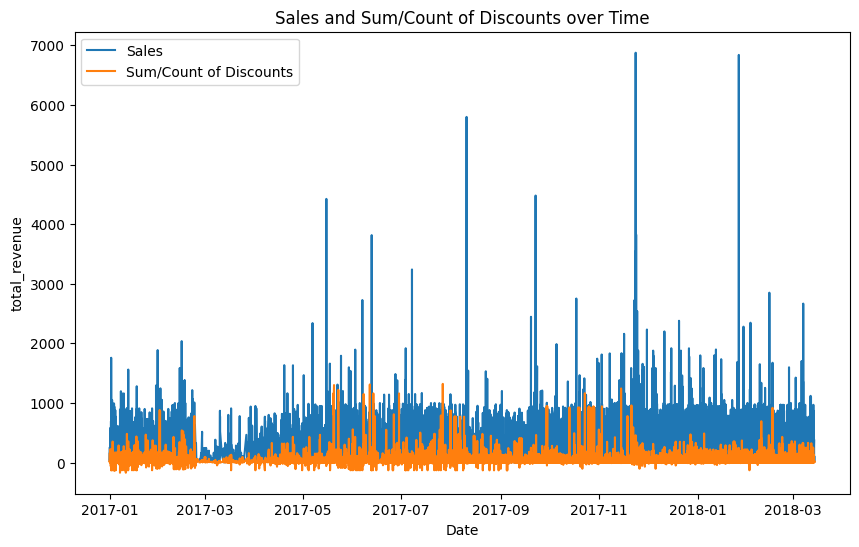

In [ ]:
#i cant looks better, i am trying (Nursah)

import matplotlib.pyplot as plt

p_ol_o["total_revenue"] = p_ol_o["unit_price"] * p_ol_o["product_quantity"]

# Calculate the total sales per date
sales_per_date = p_ol_o.groupby('date')["total_revenue"].sum()

# Calculate the sum/count of discounts per date
discounts_per_date = p_ol_o.groupby('date')['discount'].sum()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(sales_per_date.index, sales_per_date.values, label='Sales')
plt.plot(discounts_per_date.index, discounts_per_date.values, label='Sum/Count of Discounts')
plt.xlabel('Date')
plt.ylabel('total_revenue')
plt.title('Sales and Sum/Count of Discounts over Time')
plt.legend()
plt.show()



### Idea #2: When were the most discounts made? Effect on special dates?




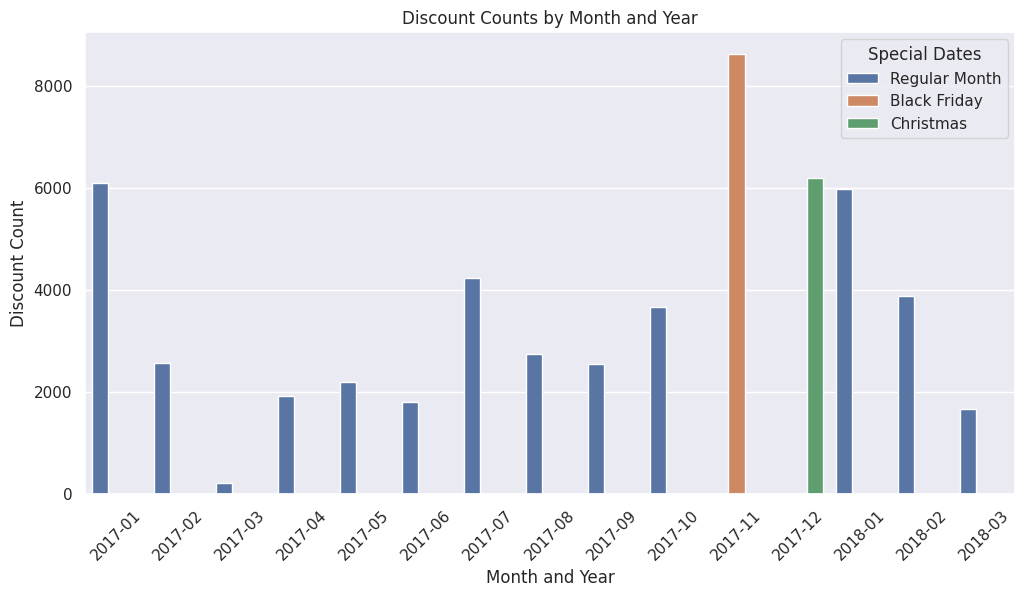

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


p_ol_o['month_year'] = p_ol_o['date'].dt.to_period('M')

discount_counts = p_ol_o.groupby('month_year')['discount'].count().reset_index()

# Create a column to indicate if the month is a special date (Christmas or Black Friday)
discount_counts['special_date'] = discount_counts['month_year'].apply(
    lambda x: 'Christmas' if x.month == 12 else 'Black Friday' if x.month == 11 else 'Regular Month'
)

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=discount_counts, x='month_year', y='discount', hue='special_date')
plt.xlabel('Month and Year')
plt.ylabel('Discount Count')
plt.title('Discount Counts by Month and Year')
plt.xticks(rotation=45)
plt.legend(title='Special Dates')
plt.show()


### Idea #3 Sales Quantity: Is there a difference between the quantity of products sold before and after the discounts?

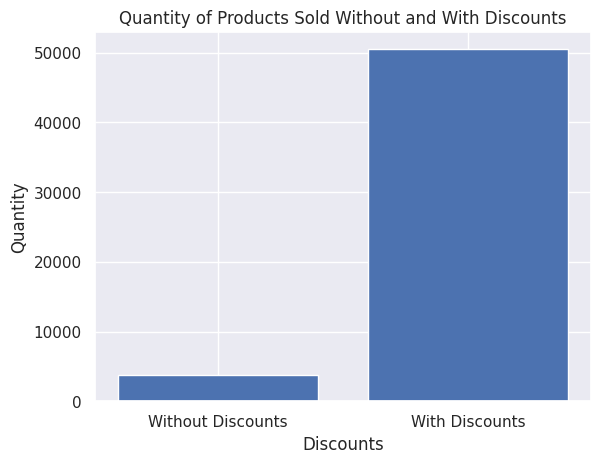

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total quantity of products sold before and after discounts
before_discounts = p_ol_o[p_ol_o['discount'] <= 0]['sku'].count()
after_discounts = p_ol_o[p_ol_o['discount'] > 0]['sku'].count()

# Create a bar chart to compare the quantities
quantities = [before_discounts, after_discounts]
labels = ['Without Discounts', 'With Discounts']

plt.bar(labels, quantities)
plt.title('Quantity of Products Sold Without and With Discounts')
plt.xlabel('Discounts')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()


In [ ]:
after_discounts

50483

### Idea #4: Sales Revenue: What is the effect of discounts on sales revenue? Will there be a change in total income as a result of discounts?

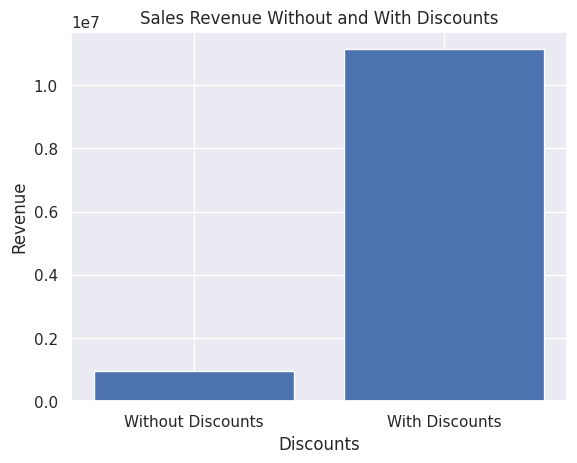

In [ ]:
import matplotlib.pyplot as plt


# Calculate total revenue before and after discounts
revenue_before_discounts = p_ol_o[p_ol_o['discount'] <= 0]['total_paid'].sum()
revenue_after_discounts = p_ol_o[p_ol_o['discount'] > 0]['total_paid'].sum()

# Create a bar chart to compare revenue
revenue = [revenue_before_discounts, revenue_after_discounts]
labels = ['Without Discounts', 'With Discounts']

plt.bar(labels, revenue)
plt.title('Sales Revenue Without and With Discounts')
plt.xlabel('Discounts')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


In [ ]:
revenue_after_discounts

11130703.280000001

In [ ]:
revenue_before_discounts

956642.49

### Idea #5: Top 10 Revenue Days:

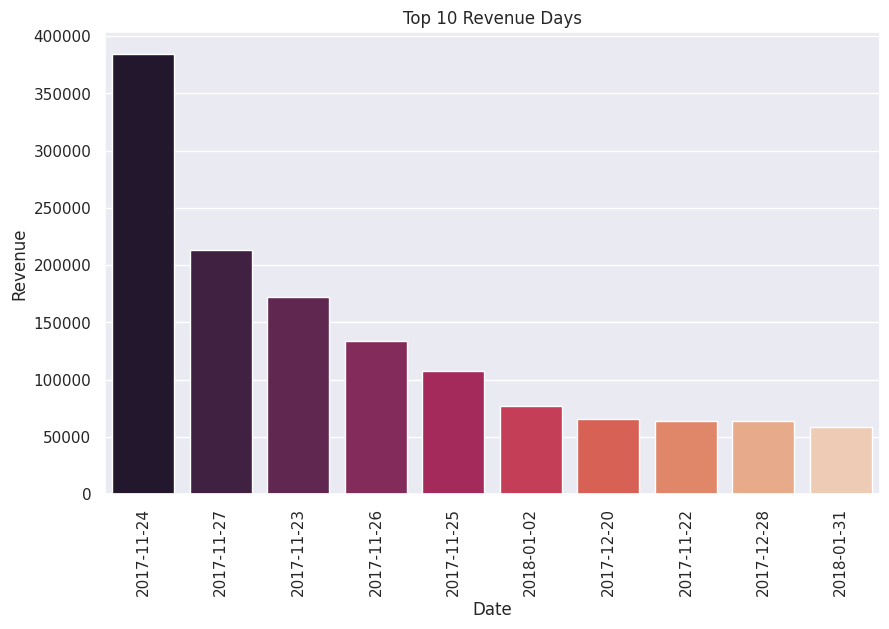

In [ ]:
p_ol_o["day"] = p_ol_o["created_date"].dt.date

import matplotlib.pyplot as plt
import seaborn as sns

top_revenue_days = p_ol_o.groupby('day')['revenue'].sum().nlargest(10).reset_index()

# Bar chart:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_revenue_days, x='day', y='revenue', palette="rocket")
plt.xticks(rotation=90)
plt.title('Top 10 Revenue Days')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

### Idea #6: Which brands have a most discount?



In [ ]:
p_ol_o_b_df.info()

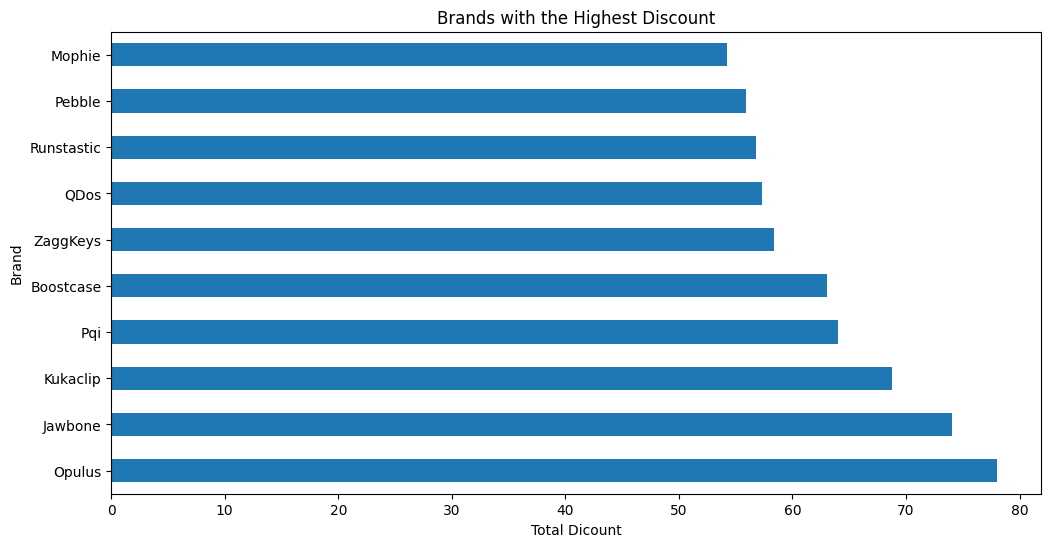

In [ ]:
import matplotlib.pyplot as plt


#merge p_ol_o and brand
p_ol_o_b_df = p_ol_o.merge(
    brands_df,
    how="left",
    left_on=p_ol_o["sku"].str[:3],
    right_on=brands_df["short"]
)


# Group by brand and calculate total discount
brand_discounts = p_ol_o_b_df.groupby("long")["discount_&"].mean()

# Sort brands by total discount in descending order
brand_discounts_sorted = brand_discounts.sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
brand_discounts_sorted.plot(kind="barh")
plt.xlabel("Total Dicount")
plt.ylabel("Brand")
plt.title("Brands with the Highest Discount")
plt.show()



### Idea #7: Average Discount vs. Revenue

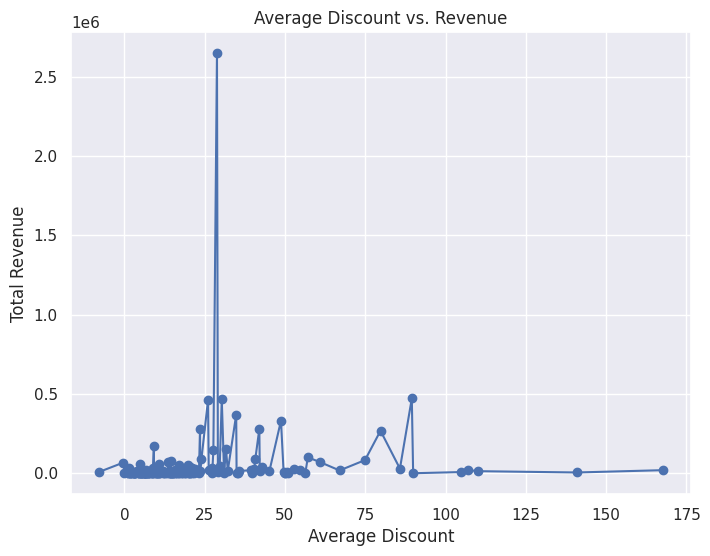

In [ ]:
import matplotlib.pyplot as plt

# Calculate average discount and revenue for each brand
brand_avg_discount = p_ol_o_b_df.groupby("long")["discount"].mean()
brand_revenue = p_ol_o_b_df.groupby("long")["total_revenue"].sum()

# Sort the data by average discount in ascending order
sorted_data = pd.concat([brand_avg_discount, brand_revenue], axis=1).sort_values("discount")

# Create a line chart
plt.figure(figsize=(8, 6))
plt.plot(sorted_data["discount"], sorted_data["total_revenue"], marker="o", linestyle="-")
plt.xlabel("Average Discount")
plt.ylabel("Total Revenue")
plt.title("Average Discount vs. Revenue")
plt.grid(True)
plt.show()


# 10. Product Categorisation


Your analytical and business skills are needed to provide clarity in the following aspects:

* How should products be classified into different categories to simplify reports and analysis?
* What is the distribution of product prices across different categories?
* How many products are being discounted?
* How big are the offered discounts as a percentage of the product prices?
* How do seasonality and special dates (Christmas, Black Friday) affect sales?
* How could data collection be improved?

At the end of this project (your instructor will set the exact date), you are expected to give a presentation to the company board and present the results of your analysis. The presentation needs to be concise, but also engaging and convincing.

## 10.1. Adds the category column

In [ ]:
category_type_df = products_df.copy()

In [ ]:
category_type_df.groupby("type").count().nlargest(30, "sku")
# shows the 30 top types with the number of items they contain (Jenny)

In [ ]:
category_type_df.loc[category_type_df["type"] == "1405"].sample(10)
# (Jenny)

In [ ]:
# 11865403 phone cases
# 12175397 servers
# 1298 ?
# 11935397 external hard drive
# 11905404 smart home
# 1282 Computer retina display
# 12635403 iPad Cases
# 13835403 sleeve cases
# 5,74E+15 desktop computer
# 1364 RAM
# 12585395 adapters
# 1296 monitors
# 1325 cables
# 5384 headsets
# 1433 SSD upgrade kit
# 12215397 external storage
# 5398 speaker
# 1,02E+12 MacBooks
# 1,44E+11 repair services
# 57445397 memory cards
# 1334 wireless adapter
# 2158 MacBooks
# 2449 apple watch straps
# 12655397 internal hard drives
# 1229 digital pens
# 12995397 docking stations
# 1515 power banks
# 13615399 chargers
# 13555403 screen protection
# 1405 graphics tablet
# others

In [ ]:
import numpy as np
category_type_df["type"].dropna(inplace=True)
# when setting inplace_False, a new copy of the DataFrame is created with the modifications you specified, while the original DataFrame remains intact. (Jenny)

In [ ]:
category_type_df["category"] = ""
# (Jenny)

In [ ]:
category_type_df.loc[category_type_df["type"] == "1405", "category"] += "Graphics tablet"
category_type_df.loc[category_type_df["type"] == "13555403", "category"] += "Screen protection"
category_type_df.loc[category_type_df["type"] == "13615399", "category"] += "Charger"
category_type_df.loc[category_type_df["type"] == "1515", "category"] += "Power bank"
category_type_df.loc[category_type_df["type"] == "12995397", "category"] += "Docking station"
category_type_df.loc[category_type_df["type"] == "1229", "category"] += "Digital pens"
category_type_df.loc[category_type_df["type"] == "12655397", "category"] += "Internal hard drive"
category_type_df.loc[category_type_df["type"] == "2449", "category"] += "Apple watch strap"
category_type_df.loc[category_type_df["type"] == "2158", "category"] += "MacBook"
category_type_df.loc[category_type_df["type"] == "1334", "category"] += "Wireless adapter"
category_type_df.loc[category_type_df["type"] == "57445397", "category"] += "Memory cards"
category_type_df.loc[category_type_df["type"] == "1,44E+11", "category"] += "Repair services"
category_type_df.loc[category_type_df["type"] == "1,02E+12", "category"] += "MacBook"
category_type_df.loc[category_type_df["type"] == "5398", "category"] += "Speaker"
category_type_df.loc[category_type_df["type"] == "12215397", "category"] += "External storage"
category_type_df.loc[category_type_df["type"] == "5384", "category"] += "Headsets"
category_type_df.loc[category_type_df["type"] == "1325", "category"] += "Cables"
category_type_df.loc[category_type_df["type"] == "1296", "category"] += "Monitor"
category_type_df.loc[category_type_df["type"] == "12585395", "category"] += "Adapter"
category_type_df.loc[category_type_df["type"] == "1364", "category"] += "RAM"
category_type_df.loc[category_type_df["type"] == "5,74E+15", "category"] += "Desktop computer"
category_type_df.loc[category_type_df["type"] == "13835403", "category"] += "sleeve cases"
category_type_df.loc[category_type_df["type"] == "12635403", "category"] += "iPad Cases"
category_type_df.loc[category_type_df["type"] == "1282", "category"] += "Computer Retina Display"
category_type_df.loc[category_type_df["type"] == "11905404", "category"] += "Smart home"
category_type_df.loc[category_type_df["type"] == "11935397", "category"] += "External hard drive"
category_type_df.loc[category_type_df["type"] == "1298", "category"] += "?"
category_type_df.loc[category_type_df["type"] == "12175397", "category"] += "Server"
category_type_df.loc[category_type_df["type"] == "11865403", "category"] += "Phone case"
category_type_df.loc[category_type_df["category"] == "", "category"] += "others"

In [ ]:
category_type_df.sample(10)

,sku,name,desc,price,in_stock,type,category
6832,APP2030,Open - Apple iPhone 6s 64GB Silver - like new,Apple Apple iPhone 6s 64 GB Silver (MKQP2QL / A),769.00,0,1716,others
8394,SYN0177,Synology NAS Server DS3018xs Mac and PC,A powerful 6-bay NAS designed for large worklo...,1439.99,0,12175397,Server
6944,LMP0025,Adapatdor LMP-C to USB Mini-DisplayPort Gray S...,USB-C Mini-DisplayPort adapter for MacBook,36.99,1,12585395,Adapter
5230,MOS0211,Moshi iGlaze XT Case iPhone 7/8 Transparent,ultra thin transparent cover with easy access ...,30.00,1,11865403,Phone case
3505,BAN0012,Panama Band & Strap Strap Red 42mm Apple Watch,Leather strap for easy installation Apple Watc...,59.00,0,2449,Apple watch strap
5823,LGE0047,"LG 38UC99-W Monitor 38 ""UHD 4K USB 3.0 USB-C",Monitor curved 38 inch IPS 4K ultra high defin...,1299.00,1,1296,Monitor
1093,AII0056,Aiino Custodia iPhone 6 B-Ball Black,Silicone Case for iPhone 6.,14.99,0,11865403,Phone case
1787,MOP0063,Mophie Juice Pack Plus Battery Case (3300 mAh)...,Case 3300 mAh battery and LED indicator for iP...,129.99,0,"5,49E+11",others
6491,LAC0147-A,Open - LaCie Rugged Mini 500GB 7200rpm USB 3.0,Hard disk portable wireless ultra-resistant US...,84.99,0,1298,?
4260,LEX0036,Lexar Lightning adapter for microSD Card Reader,Lightning adapter microSD for iPad and iPhone,37.90,0,42945397,others


## 10.2. Adds the brand column

In [ ]:
brands= brands_df.copy()

In [ ]:
category_type_df.loc[:,"brand_id"] = category_type_df["sku"].str[:3]
# new column with the shorts of the brands (Jenny)

products_brands_merge = category_type_df.merge(brands, how="left", left_on="brand_id", right_on="short")
#merges the tables products and brands on the shorts of the brands.

products_brands_merge.rename(columns={"long": "brands"}, inplace=True)
# column name long is changed to brands

products_brands_merge.drop(["brand_id", "short"], axis=1,  inplace=True)
# drops the columns brand_id and short

## 10.3. Adds the discount column

In [ ]:
ol_df = orderlines_df.copy()

In [ ]:
products_brands_ol_merge = products_brands_merge.merge(ol_df, how="left", on="sku")
# merges the products/brands table with orderline to create the discount column (Jenny)

products_brands_ol_merge.drop(["id", "id_order", "product_id", "date"], axis=1, inplace=True)
# drops all unnecessary columns

products_brands_ol_merge.loc[:, "discount"] = products_brands_ol_merge["price"] - products_brands_ol_merge["unit_price"]
# creates the discount column